# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is called linear when it's linear in coefficiants but not necessarily in variables. This means that each coefficient is multipled directly by a variable  or transformation of variable and the model adds all the terms up. It doens't matter if the variable is squared, logged or anything else as long as the betas are just multiplied by something and added together, its still considered linear.

2. When you look at the coefficient for a dummy or one-hot-encoded variable, it tells you how much the outcome changes when that dummy is 1 instead of 0 assuming everything else stays the same. The trick is you cant make a dummy for every single category because the model would break which is called the dummy trap. So, you usually leave out one category which then becomes the baseline. The coefficients you see for the dummies show how much each group differs compared to that baseline, not an absolute number.

3. You can use linear regression for classification if you set the target to 0s and 1s, but that is not a good idea. Linear regression can predict numbers way bigger than 1 or smaller than 0, which doesn't make sense for classifying. Also, it doesn't handle the boundary between classes very well Which makes logistic regression better. It is better because it forces the predictions to stay between 0 and 1 using a special curve called a sigmoid.

4. You can tell your linear model is overfitting if it does really well on the training data but badly on new data. Another way of knowing is if the training errors are super small but the test errors are big. Overfitting models also usually have huge or weird-looking coefficients because they're trying too hard to fit tiny random patterns. If you plot predicted vs actual values, it'll look great for training data but messy for new data.

5. Multicollinearity happens when two or more independent variables are very closely related and it makes your regression coefficients unstable. A way to fix it is using two stage least squares 2SLS. In Stage 1, you predict the messy variable using the other variables to make a "clean" version. In Stage 2, you use that clean version in your real regression. 

6. To include nonlinear relationships between our variables and the outcome, we can transform the features by squaring them, taking logs, or using interaction terms. For example, if we think the effect of x on y isn’t straight line, we can add x² to the model. In this way, we are still using linear regression because the model is linear in the coefficients even if the variables are curved.

7. The intercept tells us the predicted value of y when all our variables are zero kind of like the baseline starting point. A slope coefficient shows how much y changes when that variable goes up by one keeping everything else the same. For a dummy variable, the coefficient tells you how much the group with the dummy = 1 differs from the baseline group where the dummy would be equal to 0.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [10]:
# laoding data, importing libraries and doing any cleaning necessecary 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/Q1_clean.csv')
df.columns = df.columns.str.strip()


Average Price and Rating by Neighbourhood:
                     Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750

Most expensive borough on average: Manhattan


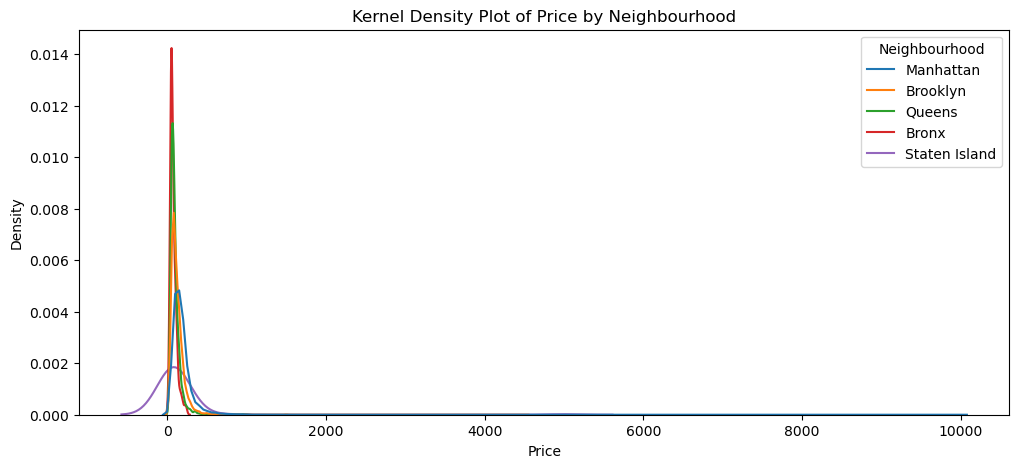

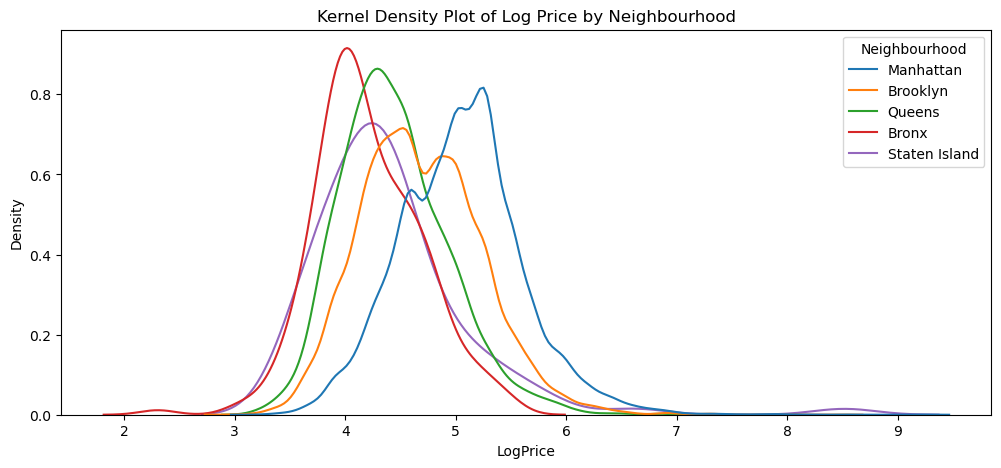

In [4]:
#2. avgh by neighborhood + kernel density plot 

avg_by_neigh = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()
print("Average Price and Rating by Neighbourhood:\n", avg_by_neigh)
most_expensive = avg_by_neigh['Price'].idxmax()
print(f"\nMost expensive borough on average: {most_expensive}")
# Kernel Density Plots
plt.figure(figsize=(12,5))
sns.kdeplot(data=df, x='Price', hue='Neighbourhood', common_norm=False)
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.show()
df['LogPrice'] = np.log(df['Price'])

plt.figure(figsize=(12,5))
sns.kdeplot(data=df, x='LogPrice', hue='Neighbourhood', common_norm=False)
plt.title('Kernel Density Plot of Log Price by Neighbourhood')
plt.show()

In [5]:
#2. regression with no intercept 
dummies = pd.get_dummies(df['Neighbourhood'])
X = dummies
y = df['Price']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

coef_df = pd.DataFrame({'Neighbourhood': X.columns, 'Coefficient': model.coef_})
print("\nQ2 Regression Coefficients (no intercept):\n", coef_df)



Q2 Regression Coefficients (no intercept):
    Neighbourhood  Coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


The coefficients in the regression matches the average prices from part 1 because we used dummy variables for each neighborhood without an intercept. In our setup, the model just learns the average price for each borough. So, the coefficient for Manhattan is the average price of listings in Manhattan, and same for the others. When you regress a continuous variable on a single categorical one like this, the coefficients represent group means.

In [6]:
# regression with intercept 
X_with_drop = pd.get_dummies(df['Neighbourhood'], drop_first=True)
model2 = LinearRegression()
model2.fit(X_with_drop, y)

coef_df2 = pd.DataFrame({'Feature': ['Intercept'] + X_with_drop.columns.tolist(),
                         'Coefficient': [model2.intercept_] + list(model2.coef_)})
print("\nQ3 Regression Coefficients (with intercept):\n", coef_df2)


Q3 Regression Coefficients (with intercept):
          Feature  Coefficient
0      Intercept    75.276498
1       Brooklyn    52.470881
2      Manhattan   108.387789
3         Queens    21.580735
4  Staten Island    70.890169


When we keep the intercept in the model, we have to drop one of the dummy variables to avoid the dummy variable trap. That dropped category becomes the baseline and in our case it’s the Bronx. The intercept shows the average price in the Bronx and the other coefficients tell you how much more or less the price is in other neighborhoods compared to the Bronx. To get the original coefficients from part 2 where there was no intercept , we just add each dummy’s coefficient to the intercept. For example, Manhattan’s value in Q2 is the Bronx intercept plus Manhattan’s difference: 75.28 + 108.39 = 183.67.

In [11]:
# price rating combined with neighborhood
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood']], drop_first=True)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model3 = LinearRegression()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nQ4 R^2: {r2:.4f}, RMSE: {rmse:.2f}")
print(f"Coefficient on Review Scores Rating: {model3.coef_[X.columns.get_loc('Review Scores Rating')]:.4f}")




Q4 R^2: 0.0459, RMSE: 140.92
Coefficient on Review Scores Rating: 1.2119


In [13]:
# added property type 
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood', 'Property Type']], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model4 = LinearRegression()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
rmse2 = root_mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print(f"\nQ5 R^2: {r2_2:.4f}, RMSE: {rmse2:.2f}")
print(f"Coefficient on Review Scores Rating: {model4.coef_[X.columns.get_loc('Review Scores Rating')]:.4f}")


Q5 R^2: 0.0542, RMSE: 140.30
Coefficient on Review Scores Rating: 1.2010


In [14]:
#most expensive property type by coefficient 
pt_coefs = pd.Series(model4.coef_, index=X.columns)
pt_coefs = pt_coefs[pt_coefs.index.str.contains('Property Type')]
print("\nMost expensive property type by coefficient:\n", pt_coefs.sort_values(ascending=False))


Most expensive property type by coefficient:
 Property Type_Bungalow            83.972440
Property Type_Loft                69.891025
Property Type_Condominium         61.907162
Property Type_Other               49.249761
Property Type_Boat                47.070419
Property Type_Townhouse           44.110768
Property Type_House               34.711346
Property Type_Villa               33.901468
Property Type_Cabin               12.389621
Property Type_Treehouse           10.325182
Property Type_Camper/RV          -13.817125
Property Type_Bed & Breakfast    -28.703920
Property Type_Chalet             -30.237720
Property Type_Castle             -41.810548
Property Type_Dorm               -42.277758
Property Type_Lighthouse         -91.438731
Property Type_Hut               -134.604484
dtype: float64


6.
The coefficient on Review Scores Rating dropped slightly from 1.21 to 1.20 when we added Property Type, which means that some of the variation in price that was originally being explained by rating is now being explained by property type instead. In multiple linear regression, each coefficient shows the effect of a variable while holding the others constant. So when we add a new variable like property type, the model adjusts the rating coefficient to reflect only the part of the relationship that isn’t shared with the new variable

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [16]:
# import dataset and all the necessary files

import pandas as pd
df = pd.read_csv('./data/heart_hw.csv')
df.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [17]:
#1
df['transplant'] = df['transplant'].str.lower()
# (a) group that survived in control group
control_survival_rate = df[df['transplant'] == 'control']['y'].mean()
print(f"survivors in control group: {control_survival_rate:.4f}")
# (b) group who survived in treatment group
treatment_survival_rate = df[df['transplant'] == 'treatment']['y'].mean()
print(f"survivors in treatment group: {treatment_survival_rate:.4f}")
# Average Treatment Effect (ATE)
ate = treatment_survival_rate - control_survival_rate
print(f"Average Treatment Effect (Treatment - Control): {ate:.4f}")

survivors in control group: 0.1176
survivors in treatment group: 0.3478
Average Treatment Effect (Treatment - Control): 0.2302


In [18]:
#2
import statsmodels.api as sm
df['transplant_binary'] = (df['transplant'].str.lower() == 'treatment').astype(int)
X = sm.add_constant(df['transplant_binary'])  # adds intercept
y = df['y']

#running the regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Mon, 05 May 2025   Prob (F-statistic):             0.0133
Time:                        12:18:54   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1176      0.07

The intercept from this regression is the survivaal rate for control group. This intercept matches with the one we found in part a earlier. The coefficient on the variable tells us how much higher the survival is for the treatment gorup compared to the control group which is same as the average treament effect we found in part b

In [19]:
#3
X = df[['transplant_binary', 'age']]
X = sm.add_constant(X)
y = df['y']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Mon, 05 May 2025   Prob (F-statistic):           0.000357
Time:                        12:22:25   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7020      0.19

The intercept changes because now we’re adjusting for age too. Instead of just comparing treatment vs. control, the model also tries to factor in the effect of age on survival. The intercept now represents the predicted survival rate for a newborn in the control group, which isn’t meaningful in real life but is part of how the math works. 

Optimization terminated successfully.
         Current function value: 0.488314
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   82
Model:                          Logit   Df Residuals:                       77
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 May 2025   Pseudo R-squ.:                  0.1417
Time:                        12:28:02   Log-Likelihood:                -40.042
converged:                       True   LL-Null:                       -46.653
Covariance Type:            nonrobust   LLR p-value:                   0.01024
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.2571      3.283     -0.992      0.321      -9.691       3.177
transpla

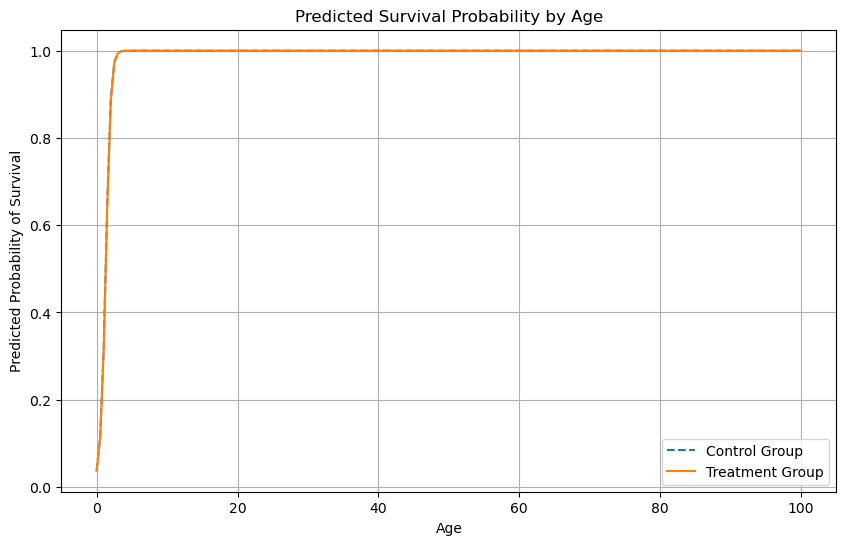

In [20]:
#4
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df['age_squared'] = df['age'] ** 2
df['interaction'] = df['transplant_binary'] * df['age']
train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train[['transplant_binary', 'age', 'age_squared', 'interaction']]
X_train = sm.add_constant(X_train)
y_train = train['y']

model = sm.Logit(y_train, X_train).fit()
print(model.summary())

ages = np.linspace(0, 100, 200)
pred_df = pd.DataFrame({
    'age': ages,
    'age_squared': ages**2,
    'transplant_binary': 0,  # Control
    'interaction': 0 * ages
})
pred_df = sm.add_constant(pred_df)
control_preds = model.predict(pred_df)

#treatment 
pred_df['transplant_binary'] = 1
pred_df['interaction'] = 1 * ages
treatment_preds = model.predict(pred_df)

plt.figure(figsize=(10, 6))
plt.plot(ages, control_preds, label='Control Group', linestyle='--')
plt.plot(ages, treatment_preds, label='Treatment Group', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Predicted Probability of Survival')
plt.title('Predicted Survival Probability by Age')
plt.legend()
plt.grid(True)
plt.show()

4. The model includes non linear age effects and an interaction between age and treatment, but none of the terms are statistically significant based on their p values. The plot shows that both control and treatment groups have very high predicted survival probabilities across all ages that are close to 1. This means the model thinks almost everyone survives, regardless of age or treatment. That’s probably because the dataset is small and possibly imbalanced. The curves for both groups are nearly the same, so the model doesn’t find much difference between getting the transplant or not when age is included

5. I would be concerend about using models similar to this to make real life decisions on who gets an organ transplant because the model we were gievn seems to be absed on a small dataset. It also didnt find any strong relationship between the two so it might not be accurate or something we can generalize. The model could be baised or missing other importnat factors such as health conditions, access to care which could unfairly prioritize some patients over others. There’s also the risk of the algorithm learning patterns from biased historical data and reinforcing inequality. And even if the model were better, using it as the only decision tool could remove the human judgment doctors use to consider each case individually.

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
